This notebook tries to solve end-of-book questions from Ch3: classification of Hands On ML by Aurélien Géron. 

## Problem 1

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
on the test set. Hint: the KNeighborsClassifier works quite well for this task;
you just need to find good hyperparameter values (try a grid search on the
weights and n_neighbors hyperparameters).


In [147]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# load dataset from core nb
mnist = fetch_openml('mnist_784', version=1) # set asframe = False to import the dataset as nparray
X, y = mnist['data'], mnist['target']
Xarray = np.array(X)
y = y.astype('int64')
y = np.array(y)

In [16]:
def plot_num (arr):
    arr = arr.reshape(28,28)
    plt.figure(figsize=[2,2])
    plt.imshow(arr, cmap = 'binary')
    plt.axis('off')
    plt.show()
    return arr

In [148]:
XT, Xt, yT, yt = X[:60000], X[60000:], y[:60000], y[60000:]

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XT_scaled = scaler.fit_transform(XT)

__so far__: imported dataset, train-test split, scaled it. 

__next__: choose classifier (KNN- mentioned in the question), run gridsearch over hyperparameters and check outputs. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 5)

In [26]:
?KNeighborsClassifier

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [27]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Now lets run a `GridSearch` over n_neighbors and weights. 

In [28]:
# def accuracy_score (y_true, y_pred): 
#     """"
#     To return the accuracy score based on true and predicted label values. 
#     """
#     y_tracker = (y_true == y_pred)
#     y_tracker = y_tracker.astype(int)
#     correctly_classified = np.sum(y_tracker)
#     return correctly_classified/(len(y_true))

def accuracy_score(y_true, y_pred): 
    """
    Returns the accuracy score based on true and predicted label values.
    """
    return np.sum(y_true == y_pred) / len(y_true)


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

grid = GridSearchCV(
    estimator=knn_clf,
    param_grid={'weights': ['uniform','distance' ]}, 
    scoring={'accuracy' : make_scorer(accuracy_score)}, 
    refit='accuracy',
    return_train_score=True, 
    cv=5
)

grid.fit(XT_scaled, yT)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'weights': ['uniform', 'distance']}, refit='accuracy',
             return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict')})

In [30]:
import pandas as pd
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.195313,0.010740,7.30631,1.206236,uniform,{'weights': 'uniform'},0.941083,0.942917,0.943333,0.936333,...,0.94205,0.003363,2,0.962938,0.962187,0.961396,0.962875,0.96225,0.962329,0.00056
1,0.205648,0.014565,9.46613,2.277491,distance,{'weights': 'distance'},0.942333,0.945250,0.945333,0.940417,...,0.94435,0.002751,1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.00000


In [46]:
grid.best_params_

{'weights': 'distance'}

The average test accuracy by 'weights' parameter is almost same at 0.94
The n_neighbors parameters next hopefully will have more distinction or a progression in accuracies. 

In [31]:
knn_clf2 = KNeighborsClassifier(weights='distance')

In [33]:
grid2 = GridSearchCV(
    estimator=knn_clf2,
    param_grid={'n_neighbors': [n for n in range(4,8)]}, 
    scoring={'accuracy' : make_scorer(accuracy_score)}, 
    refit='accuracy',
    return_train_score=True, 
    cv=5
)

grid2.fit(XT_scaled, yT)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [4, 5, 6, 7]}, refit='accuracy',
             return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict')})

In [35]:
pd.DataFrame(grid2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.207604,0.022911,7.142292,1.082782,4,{'n_neighbors': 4},0.945500,0.946833,0.947167,0.942750,...,0.946517,0.002462,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.185730,0.004637,7.654163,0.492207,5,{'n_neighbors': 5},0.942333,0.945250,0.945333,0.940417,...,0.944350,0.002751,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.246461,0.030862,10.188510,3.700407,6,{'n_neighbors': 6},0.943333,0.946417,0.945833,0.939500,...,0.944717,0.003085,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.238547,0.062722,12.156495,2.591128,7,{'n_neighbors': 7},0.940333,0.943417,0.943417,0.937667,...,0.942350,0.003135,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [44]:
grid2.best_params_

{'n_neighbors': 4}

Ideally you want to run all parameters in a single grid, but I disnt wish to wait for multiple hours maybe. So i took a bet and ran separate grids assuming independence in parameters!

In [37]:
knn_clf3 = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf3.fit(XT_scaled, yT)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [41]:
Xt_scaled = scaler.transform(Xt)

y_knn_pred = knn_clf3.predict(Xt_scaled)

from sklearn.metrics import accuracy_score
accuracy_score(yt, y_knn_pred)

0.9489

Maximum accuracy with KNN still seems to be 0.94 on the test set, which is consistent with the cross validation on the training set. Idk why they said _97%_ accuracy in the question statement. 

# Problem 2: Data augmentation by image shifting

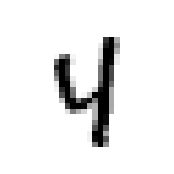

numpy.ndarray

In [112]:
some_digit = Xarray[1006]
type(some_digit)

imgx = plot_num(some_digit)
type(imgx)

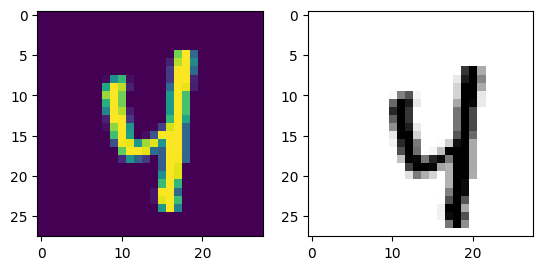

(28, 28)

In [149]:
from scipy.ndimage import shift

def shift_image_and_plot(num_arr, down, right, cval = 0):
    num_arr = num_arr.reshape(28,28)

    plt.subplot(1,2,1)
    plt.imshow(num_arr, cmap = 'viridis')

    pic_arr = shift(num_arr, [down, right], cval = cval)

    plt.subplot(1,2,2)
    plt.imshow(pic_arr, cmap = 'binary')
    plt.show()
    return pic_arr

# Test
shifted_img = shift_image_and_plot(Xarray[1006], 2, 2, cval=0)
shifted_img.shape



Phew took some time to write the functions tidily. But the shift is now clearly visible with the axes intact. 

In [150]:
print(XT_scaled[10].shape)

(784,)


AH fuck: so reshape to 28*28 -> shift pixel L,R,U,D -> reshape to (784,) -> append to X 

I was messing up the reshape steps oof :(

In [122]:
def shift_image(num_arr, shift_array, cval = 0):
    # num_arr = 1D arr
    num_arr = num_arr.reshape(28,28)
    # its imp to note that shift can only apply on 2d or 3d arrays!
    pic_arr = shift(num_arr, shift_array, cval = cval)
    #reshape to 1d array to append to training set
    pic_arr = pic_arr.reshape(784,)
    return pic_arr

shifted_array = shift_image(XT_scaled[11], [0,-1], 0)
print(shifted_array.shape)

k = np.vstack([XT_scaled, shifted_array])
k.shape


(784,)


(60001, 784)

In [158]:
def augment_dataset(X, y):
    # Define shift directions
    shits = [
        [-1, 0],  # up
        [1, 0],   # down
        [0, -1],  # left
        [0, 1]    # right
    ]
    # Initialize extended arrays
    X_extended = X.copy()
    y_extended = y.copy()
    
    # Perform shifts for each image
    for i in range(X.shape[0]):
        for shit in shits:
            # Shift the image
            shifted_img = shift_image(X[i], shit, cval=0)
            
            # Append shifted image and corresponding label
            X_extended = np.vstack([X_extended, shifted_img])
            y_extended = np.concatenate([y_extended, [y[i]]]) # vstack runs into serious problems with array stacking on int: (y[i]) - OOF

    
    return X_extended, y_extended

In [ ]:
# TRIAL BOX

shits = [
        [-1, 0],  # up
        [1, 0],   # down
        [0, -1],  # left
        [0, 1]    # right
    ]
y_extended = yT
X_extended = XT_scaled

print(type(y_extended))

for i in range(2):
    for shit in shits:
        # Shift the image
        shifted_img = shift_image(XT_scaled[i], shit, cval=0)
        print(shifted_img.shape)
        print(X_extended.shape)
        print(y_extended.shape)
        
        # Append shifted image and corresponding label
        X_extended = np.vstack([X_extended, shifted_img])
        # y_extended = np.vstack([y_extended, y[i]]) # -- isme problem HAI MKC y[i] integer hai and y_extended numpy array
        y_extended = np.concatenate([y_extended, [y[i]]])
        

<class 'numpy.ndarray'>
(784,)
(60000, 784)
(60000,)
(784,)
(60001, 784)
(60001,)
(784,)
(60002, 784)
(60002,)
(784,)
(60003, 784)
(60003,)
(784,)
(60004, 784)
(60004,)
(784,)
(60005, 784)
(60005,)
(784,)
(60006, 784)
(60006,)
(784,)
(60007, 784)
(60007,)


In [159]:
X_augmented, y_augmented = augment_dataset(XT_scaled, yT)

KeyboardInterrupt: 

In [135]:
a1 = np.array([[1,2,3], [-1,2, 0]])
a2 = np.array([-0.5, 7, 8])
print(a1.shape)
print(a2.shape)

(2, 3)
(3,)


In [146]:
type(a2)

numpy.ndarray

In [91]:
np.vstack([a1, a2])

array([[ 1. ,  2. ,  3. ],
       [-1. ,  2. ,  0. ],
       [-0.5,  7. ,  8. ]])